In [4]:
import os
import cv2
import joblib
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from PIL import Image

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, BaggingClassifier, AdaBoostClassifier, RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


<H3>Loading Training Data</H3>

In [5]:
def load_data(dir , df):
    # Load images and labels into arrays
    images = []
    labels = []

    for index, row in df.iterrows():
        image_file_path = os.path.join(dir, row['filename'])
        image = cv2.imread(image_file_path)
        if image is not None:
            resized_image = cv2.resize(image, (100, 100))  # Resize to a fixed size
            flattened_image = resized_image.flatten()  # Flatten the image into a 1D array
        images.append(flattened_image)
        labels.append(row['target'])

    # Convert lists to numpy arrays
    return np.array(images) , np.array(labels)

In [6]:
dir = "../DATASETS/guava.v6i.tensorflow/train"
df = pd.read_csv(dir + "/_annotations.csv")
label_encoder = LabelEncoder()
# Encode the 'class' column
df['target'] = label_encoder.fit_transform(df['class'])

train_data, train_labels = load_data(dir , df)

print("Loaded data shape:", train_data.shape)
print("Loaded labels shape:", train_labels.shape)


Loaded data shape: (430, 30000)
Loaded labels shape: (430,)


In [7]:
dir = "../DATASETS/guava.v6i.tensorflow/test"
df = pd.read_csv(dir + "/_annotations.csv")
label_encoder = LabelEncoder()
# Encode the 'class' column
df['target'] = label_encoder.fit_transform(df['class'])

test_data, test_labels = load_data(dir , df)

print("Loaded data shape:", test_data.shape)
print("Loaded labels shape:", test_labels.shape)

Loaded data shape: (26, 30000)
Loaded labels shape: (26,)


In [8]:
dir = "../DATASETS/guava.v6i.tensorflow/valid"
df = pd.read_csv(dir + "/_annotations.csv")
label_encoder = LabelEncoder()
# Encode the 'class' column
df['target'] = label_encoder.fit_transform(df['class'])

valid_data, valid_labels = load_data(dir , df)

print("Loaded data shape:", valid_data.shape)
print("Loaded labels shape:", valid_labels.shape)

Loaded data shape: (42, 30000)
Loaded labels shape: (42,)


In [6]:
# Define the classifiers
classifiers = {
    "KNN": KNeighborsClassifier(n_neighbors=3),
    "SVM": SVC(kernel='linear', random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42),
    "Naive Bayes": GaussianNB(),
    "Logistic Regression": LogisticRegression(random_state=42),
    # "Bagging Classifier": BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100, random_state=42),
    # "AdaBoost Classifier": AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
}

# Define paths
model_dir = "../Model/guavaClassification/"

# Initialize dictionaries to store results
validation_results = {}
test_results = {}

# Loop through each classifier
for name, classifier in classifiers.items():
    # Train the classifier
    classifier.fit(train_data, train_labels)

    # Save the trained model
    model_filename = os.path.join(model_dir, name + ".joblib")
    joblib.dump(classifier, model_filename)
    
    # Predict on validation set
    valid_predictions = classifier.predict(valid_data)
    
    # Calculate accuracy
    val_accuracy = accuracy_score(valid_labels, valid_predictions)
    
    # Calculate precision
    val_precision = precision_score(valid_labels, valid_predictions, average='weighted')
    
    # Predict on test set
    test_predictions = classifier.predict(test_data)
    
    # Calculate accuracy
    test_accuracy = accuracy_score(test_labels, test_predictions)
    
    # Calculate precision
    test_precision = precision_score(test_labels, test_predictions, average='weighted')
    
    # Store results in dictionaries
    validation_results[name] = {'Accuracy': val_accuracy, 'Precision': val_precision}
    test_results[name] = {'Accuracy': test_accuracy, 'Precision': test_precision}

# Convert dictionaries to DataFrame
validation_df = pd.DataFrame(validation_results).transpose()
test_df = pd.DataFrame(test_results).transpose()

# Display the DataFrames
print("Validation Results:")
print(validation_df)

print("\nTest Results:")
print(test_df)

d:\Codes\projects\Automatic-Object-detection-using-Thermal-imaging\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Validation Results:
                     Accuracy  Precision
KNN                  0.714286   0.709184
SVM                  0.809524   0.807823
Gradient Boosting    0.809524   0.826488
Naive Bayes          0.738095   0.735450
Logistic Regression  0.833333   0.832099
Random Forest        0.809524   0.812698

Test Results:
                     Accuracy  Precision
KNN                  0.807692   0.871795
SVM                  0.884615   0.911243
Gradient Boosting    0.807692   0.813054
Naive Bayes          0.615385   0.631868
Logistic Regression  0.884615   0.911243
Random Forest        0.846154   0.859890


In [7]:
# Convert dictionaries to DataFrame
validation_df = pd.DataFrame(validation_results).transpose()
test_df = pd.DataFrame(test_results).transpose()

In [8]:
# Display the DataFrames
print("Validation Results:")
validation_df

Validation Results:


,Accuracy,Precision
KNN,0.714286,0.709184
SVM,0.809524,0.807823
Gradient Boosting,0.809524,0.826488
Naive Bayes,0.738095,0.735450
Logistic Regression,0.833333,0.832099
Random Forest,0.809524,0.812698


In [9]:
print("\nTest Results:")
test_df


Test Results:


,Accuracy,Precision
KNN,0.807692,0.871795
SVM,0.884615,0.911243
Gradient Boosting,0.807692,0.813054
Naive Bayes,0.615385,0.631868
Logistic Regression,0.884615,0.911243
Random Forest,0.846154,0.859890


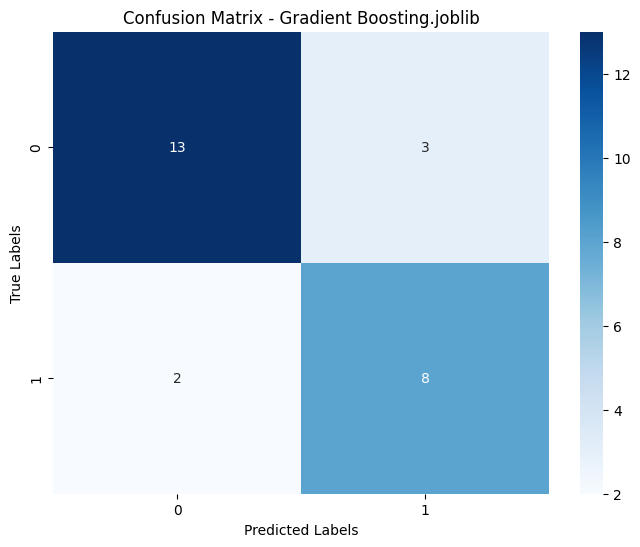

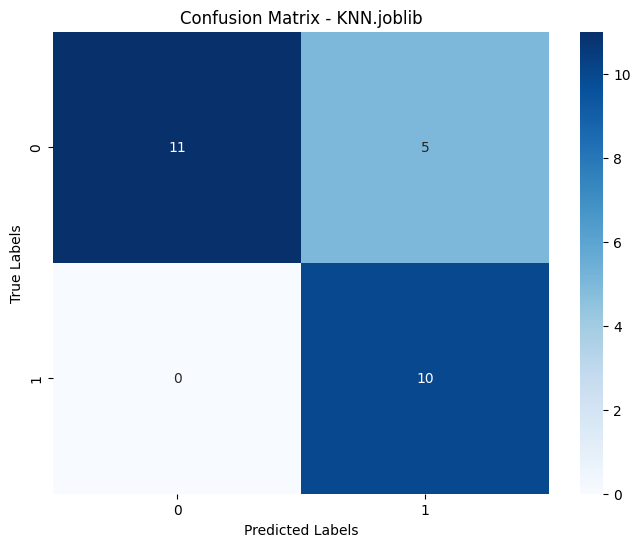

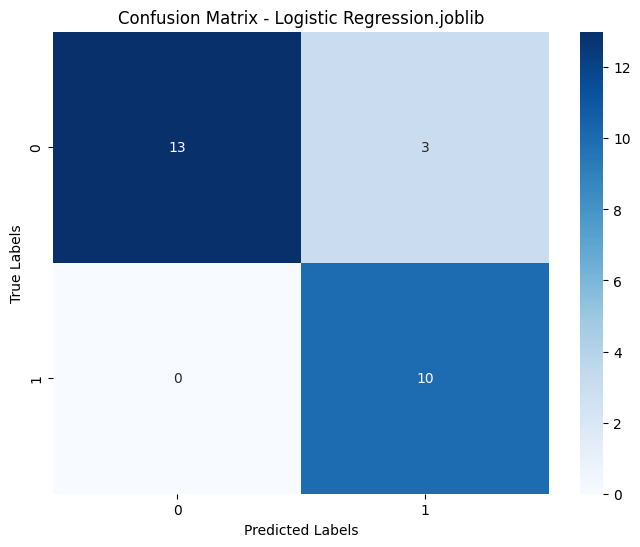

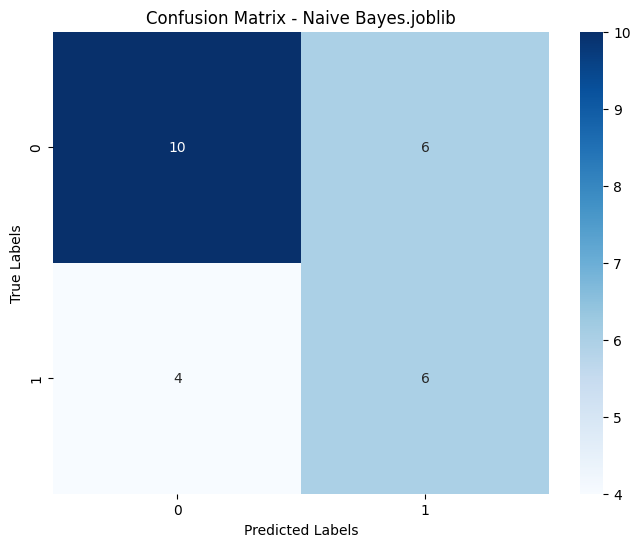

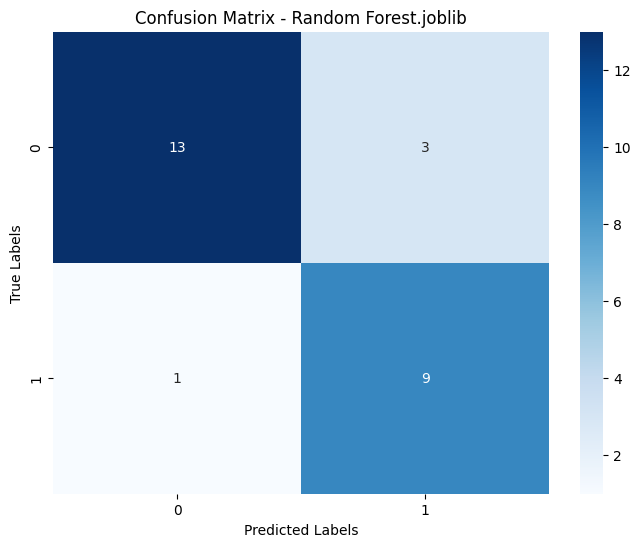

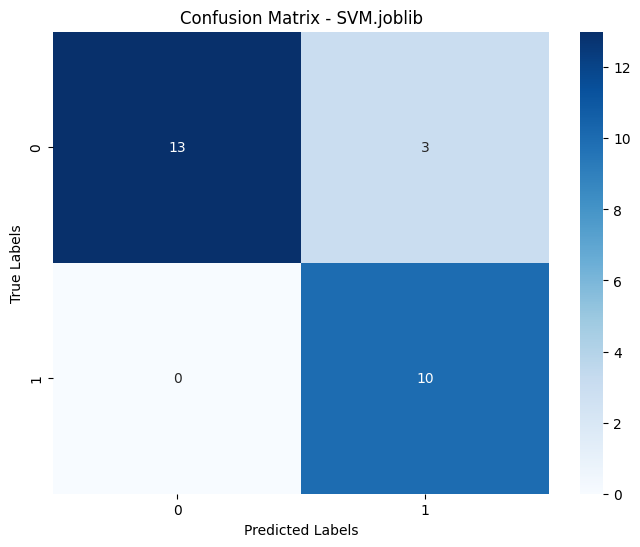

In [20]:
import os
import joblib
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

directory_path = "../Model/guavaClassification/"

# List all files in the directory
files = os.listdir(directory_path)

# Prepare your test data and labels (assuming you have them loaded as test_data and test_labels)

# Iterate through the model files in the directory
for file in files:
    # Construct the full path to the model file
    model_path = os.path.join(directory_path, file)

    # Load the model
    loaded_model = joblib.load(model_path)

    # Make predictions using the loaded model
    predictions = loaded_model.predict(test_data)

    # Create a confusion matrix
    confusion = confusion_matrix(test_labels, predictions)

    # Plot the confusion matrix as a heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    
    # Set the title of the confusion matrix plot as the file name
    plt.title(f"Confusion Matrix - {file}")
    
    # Save each confusion matrix as an image with a unique file name
    plt.savefig(f"confusion_matrix_{file}.png")
    
    # Display the plot (optional)
    plt.show()
